<a href="https://colab.research.google.com/github/Jaqueline-Silva3001/Controle-de-Processos/blob/main/Pr%C3%A1tica_3_Controlador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

# Usando `scipy` (OPCIONAL)

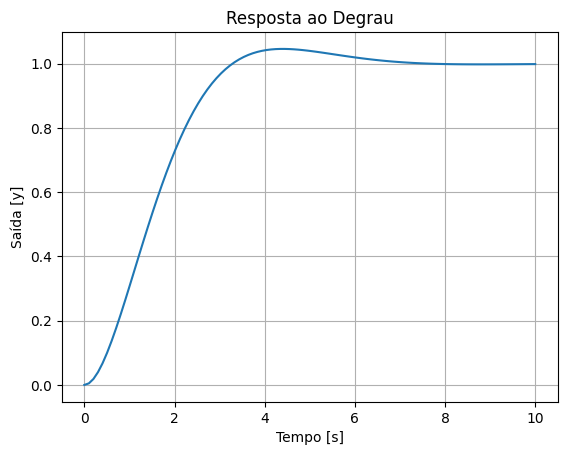

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

# Definindo os parâmetros
K = 1.0        # Ganho
tau = 1.0      # Período
xi = 0.7       # Fator de amortecimento

# Definindo o numerador e denominador
num = [K]  # Numerador
den = [tau**2, 2*xi*tau, 1]  # Denominador

# Criando a função de transferência
G = signal.TransferFunction(num, den)

# Calculando a resposta ao degrau
t, y = signal.step(G)

# Plotando a resposta
plt.plot(t, y)
plt.title("Resposta ao Degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Saída [y]")
plt.grid(True)
plt.show()

# Usando python-control

## Instalando e importando as bibliotecas

In [ ]:
! pip install -qq control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Ajustando o tamanho da fonte de saída das células: OPCIONAL
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 25px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

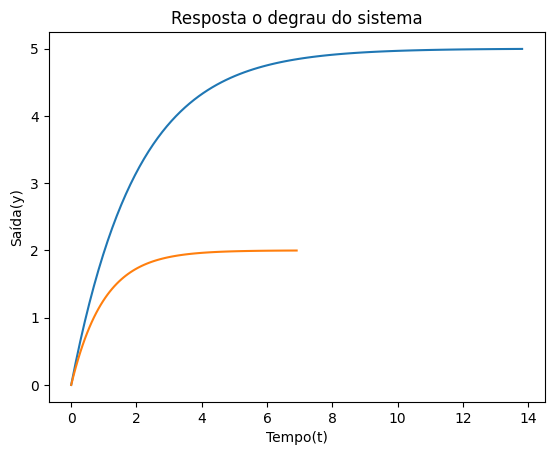

In [ ]:
# Sistemas de primeira ordem
G1 = ct.tf(5, [2, 1])
G2 = ct.tf(2, [1, 1])
G1.dcgain()

p1 = G1.poles()  # raízes do denominador
z1 = G1.zeros()  # raízes do numerador

# Simulação
G = [G1, G2]
t, y = ct.step_response(G1)
plt.plot(t, y)
plt.xlabel('Tempo(t)')
plt.ylabel('Saída(y)')
plt.title('Resposta o degrau do sistema G1')
plt.grid()

G = [G1, G2]
t, y = ct.step_response(G2)
plt.plot(t, y)
plt.xlabel('Tempo(t)')
plt.ylabel('Saída(y)')
plt.title('Resposta o degrau do sistema')
plt.grid()



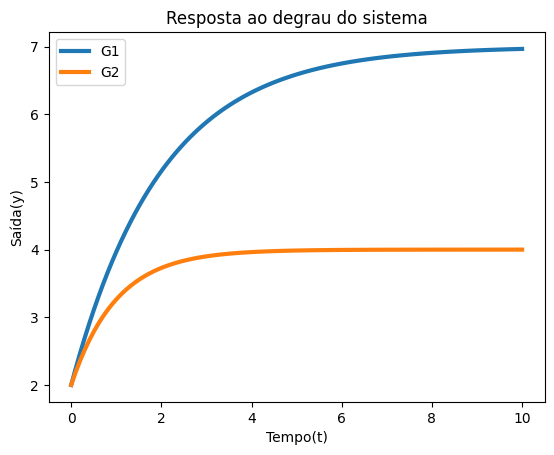

In [ ]:
# Sistemas de primeira ordem
G1 = ct.tf(5, [2, 1])
G2 = ct.tf(2, [1, 1])
G1.dcgain()

p1 = G1.poles()  # raízes do denominador
z1 = G1.zeros()  # raízes do numerador

# Simulação
y0 = 2.0
delta_u = 1.0
G = [G1, G2]
for i,g in enumerate(G):
  t, y_desvio = ct.step_response(g, T=10)
  y = y_desvio+y0
  plt.plot(t, y, label = 'G'+str(i+1), linewidth=3)
  plt.xlabel('Tempo(t)')
  plt.ylabel('Saída(y)')
  plt.legend()
  plt.title('Resposta ao degrau do sistema')
  plt.grid()

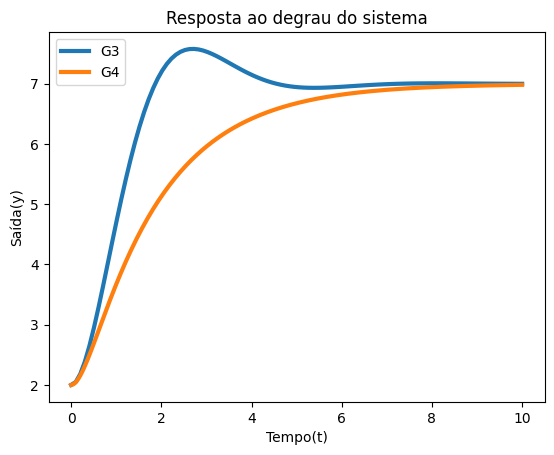

In [ ]:
# Sistemas de segunda ordem
G3 = ct.tf(15,[1.5, 2.4, 3])
G4 = ct.tf(15,[1.5, 6, 3])



# Simulação
y0 = 2.0
delta_u = 1.0
G = [G3, G4]
for i,g in enumerate(G):
  t, y_desvio = ct.step_response(g, T=10)
  y = y_desvio+y0
  plt.plot(t, y, label = 'G'+str(i+3), linewidth=3)
  plt.xlabel('Tempo(t)')
  plt.ylabel('Saída(y)')
  plt.legend()
  plt.title('Resposta ao degrau do sistema')
  plt.grid()




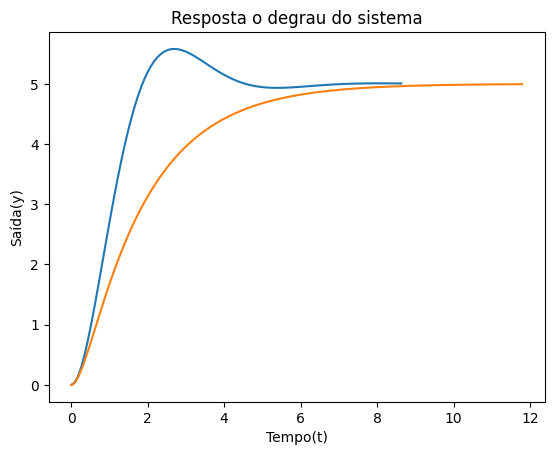

In [ ]:
# Sistemas de segunda ordem
G3 = ct.tf(15,[1.5, 2.4, 3])
G4 = ct.tf(15,[1.5, 6, 3])


# Simulação
G = [G3, G4]
t, y = ct.step_response(G3)
plt.plot(t, y)
plt.xlabel('Tempo(t)')
plt.ylabel('Saída(y)')
plt.title('Resposta o degrau do sistema G1')
plt.grid()

G = [G3, G4]
t, y = ct.step_response(G4)
plt.plot(t, y)
plt.xlabel('Tempo(t)')
plt.ylabel('Saída(y)')
plt.title('Resposta o degrau do sistema')
plt.grid()

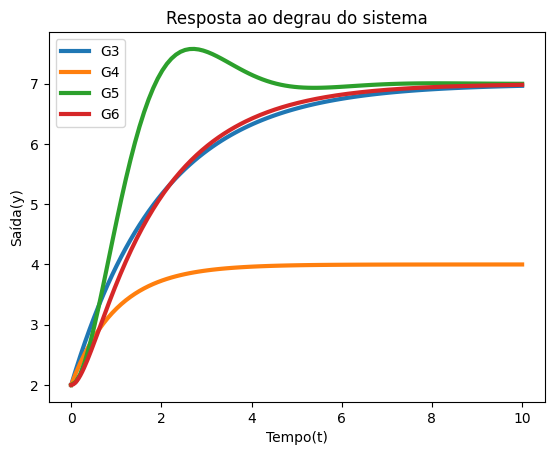

In [ ]:
# Sistemas de segunda ordem
G3 = ct.tf(15,[1.5, 2.4, 3])
G4 = ct.tf(15,[1.5, 6, 3])
G1 = ct.tf(5, [2, 1])
G2 = ct.tf(2, [1, 1])


# Simulação
y0 = 2.0
delta_u = 1.0
G = [G1, G2, G3, G4]
for i,g in enumerate(G):
  t, y_desvio = ct.step_response(g, T=10)
  y = y_desvio+y0
  plt.plot(t, y, label = 'G'+str(i+3), linewidth=3)
  plt.xlabel('Tempo(t)')
  plt.ylabel('Saída(y)')
  plt.legend()
  plt.title('Resposta ao degrau do sistema')
  plt.grid()

## Algumas funções especiais

In [ ]:
# Obter propriedades dos sistemas
G = [G1, G2, G3, G4]
for g in G:
  print(g.poles())

[-0.5+0.j]
[-1.+0.j]
[-0.8+1.16619038j -0.8-1.16619038j]
[-3.41421356+0.j -0.58578644+0.j]


TransferFunction(array([ 3. , -5. ,  0. ,  0.5]), array([ 8, 15,  5, 13,  4]))

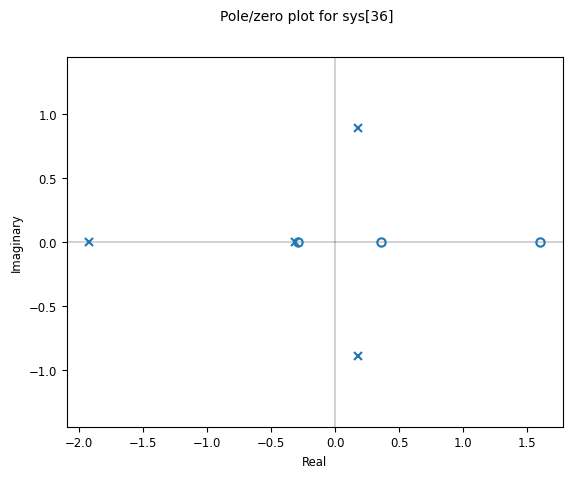

In [ ]:
G5 = ct.tf([3,-5, 0, 0.5],[8, 15, 5, 13, 4])
ct.pzmap(G5); # vai fazer um mapa cartesiano dos polos e zeros.
G5


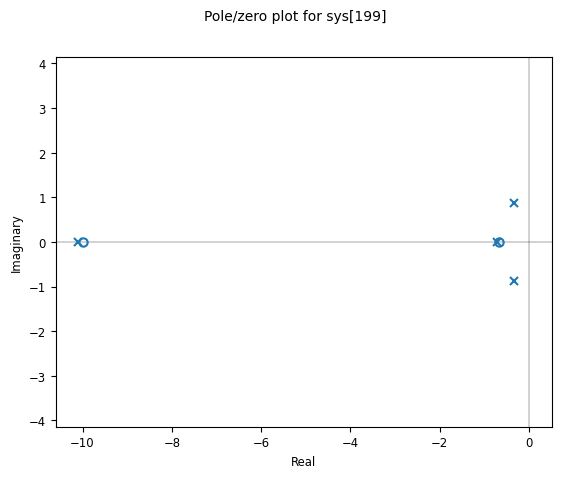

In [ ]:
GC = ct.tf([1.125, 0.75], [1.5, 0])
GP = ct.tf(2.5, [2, 3, 1])
GM = ct.tf(1, [0.1, 1])

G = (GC*GP)/(1+GC*GP*GM)
H = ct.series(GC,GP)
GG = ct.feedback(H,GM)
ct.pzmap(GG); # vai fazer um mapa cartesiano dos polos e zeros.


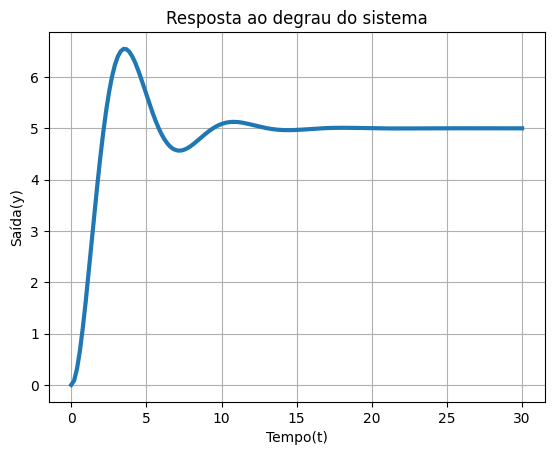

In [ ]:
# Simulação
y0 = 0
delta_u = 5.0
G = [GG]

t, y_desvio = ct.step_response(g, T=30)
y = delta_u*y_desvio+y0
plt.plot(t, y, linewidth=3)
plt.xlabel('Tempo(t)')
plt.ylabel('Saída(y)')
plt.title('Resposta ao degrau do sistema')
plt.grid()